## <center> Final Results from Notebook Collection <\center>
Big picture stuff

Convergence for:
 - observable/measured folding (<font color=blue>blue</font>) events
 - calculated HMM folding (<font color=red>red</font>) and unfolding (<font color=green>green</font>) rates

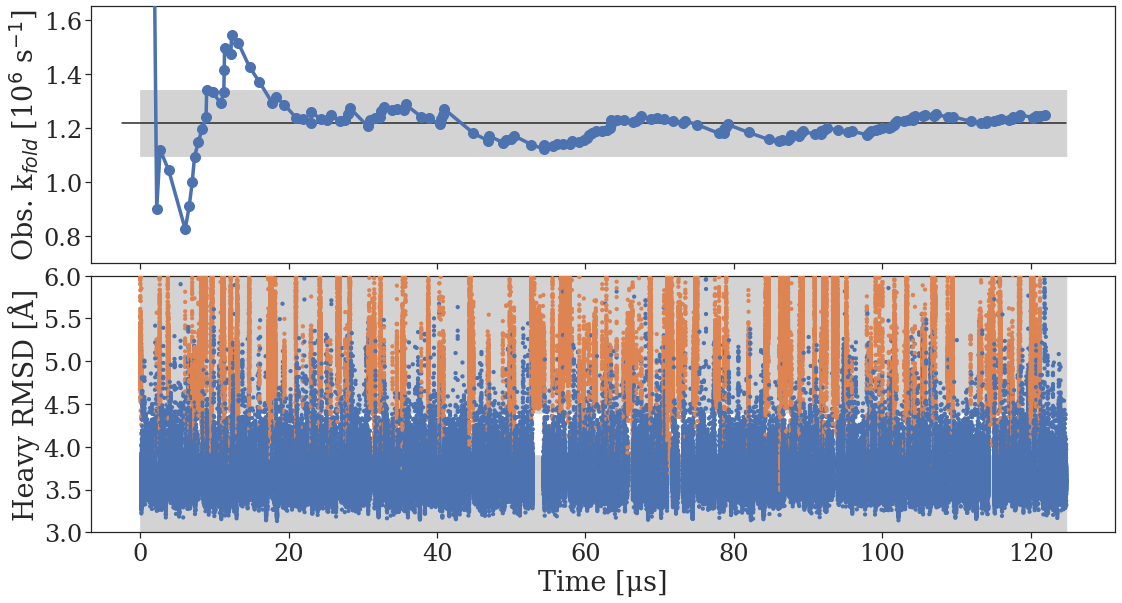

In [53]:
plt.close()
fig, axes = plt.subplots(2,1,figsize=(16,9), sharex=True)

n_frames = -1
interfacecolor = "lightgrey"
colorcycle = seaborn.color_palette("husl", n_colors=8)
escapecolor= [min(1, np.sum(c)) for c in zip(colorcycle[0], (0.0, -0.09, -0.09, 0))]
entercolor = [min(1, np.sum(c)) for c in zip(colorcycle[6], (-0.15, -0.15, -0.15, 0))]

ratesdates = [_index_to_time(tt) for tt in transition_data[bestone][0][1][0]]

axes[0].plot(
    ratesdates,
    [(i+1)/rd for i,rd in enumerate(ratesdates)],
    linewidth=3.5,
    #ax=axes[0],
    zorder=10,
    markersize=10,
    marker="o",
)



plt.xlabel(label_timesteps)

# Timeseries Values
seaborn.scatterplot(
    x=traj_rmsd_df[label_timesteps][::10],
    y=traj_rmsd_df[label_heavies][::10],
    #color=timeseriescolor,
    hue=the_dtrajs[bestone][::10],
    ax=axes[1],
    zorder=10,
    linewidth=0,
    legend=False,
    size=3,
)

axes[0].set_ylabel("Obs. k$_{fold}$ [10$^6$ s$^{-1}$]", fontsize=27)
axes[1].yaxis.label.set_fontsize(27)
axes[1].xaxis.label.set_fontsize(27)

#axes[1].get_xticklabels().set_fontsize(22)
#axes[1].get_yticklabels().set_fontsize(22)
#axes[0].get_yticklabels().set_fontsize(22)

for tick in axes[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

for tick in axes[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

#axes[0].set_yticks([0, 0.5, 1., 1.5])
for tick in axes[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

# Plus or minus 0.2 MHz from Angswante paper
rfinal = dict()

_exprateerror = 0.1

rfinal["bwd"] = observed_rates[bestone]["backwards"].iloc[-1]
rfinal["fwd"] = observed_rates[bestone]["forwards"].iloc[-1]

axes[0].axhline(averagerate, 0.03, 0.952, color=(0.15, 0.15, 0.15, 1))

axes[0].fill_between(
    observed_rates[label_timesteps][label_longtraj][:],
    (1+_exprateerror) * averagerate,
    (1-_exprateerror) * averagerate,
    color=interfacecolor,
)

_interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
#   - transition interface locations
for i in range(len(_interfaces)//2):
    axes[1].fill_between(
        traj_rmsd_df[label_timesteps][:],
        _interfaces[2*i],
        _interfaces[2*i+1],
        color=interfacecolor,
    )

axes[0].set_ylim(0.7, 1.65)
axes[1].set_ylim(3, 6)
#axes[1].set_xticks([])

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)
plt.savefig(analysis_directory / "folding-observedrate_RMSD_statecolor-stacked-longtraj-best-full.png", dpi=1200)

---------------
--------------

---------------

---------------

---------------

---------------

---------------

---------------

---------------

---------------